<a href="https://colab.research.google.com/github/erosthales/aprendizado-continuo-alura/blob/main/modelo_Atraso_de_Voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [4]:
dados.shape

(71175, 11)

In [5]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Visualização de Gráfica dos Dados

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
average_deplay = dados.groupby('airline')['delay'].mean().reset_index()
average_deplay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


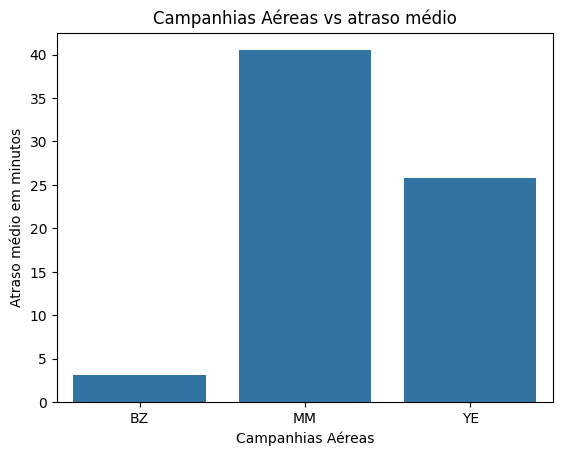

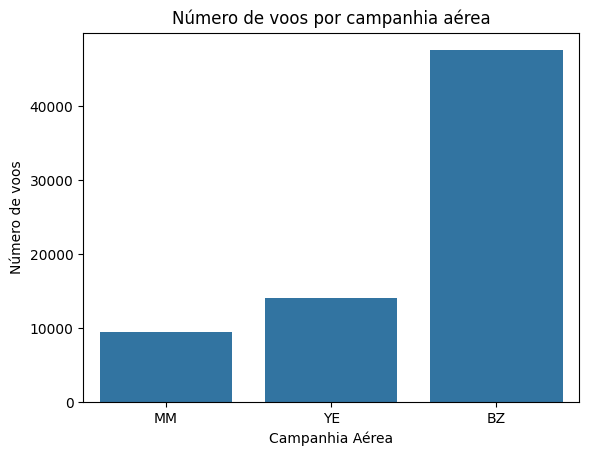

In [10]:

sns.barplot(x='airline', y ='delay', data=average_deplay)
plt.title('Campanhias Aéreas vs atraso médio')
plt.xlabel('Campanhias Aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show();

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por campanhia aérea')
plt.xlabel('Campanhia Aérea')
plt.ylabel('Número de voos')
plt.show();

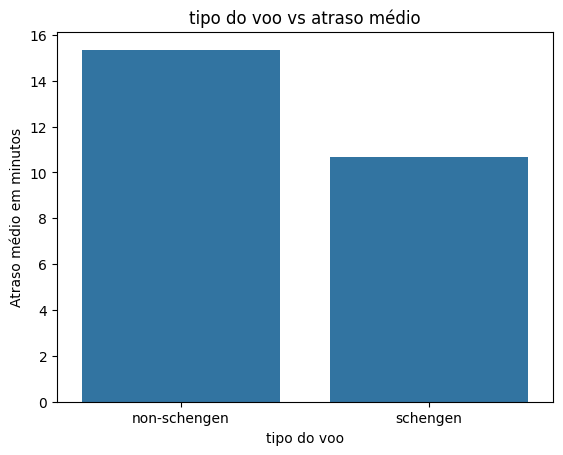

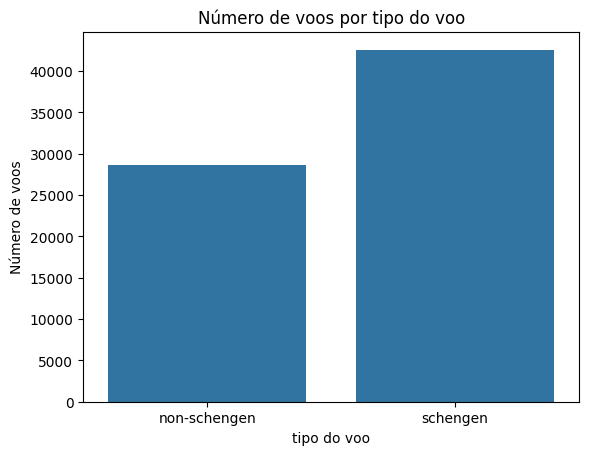

In [11]:
average_deplay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y ='delay', data=average_deplay)
plt.title('tipo do voo vs atraso médio')
plt.xlabel('tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show();

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('tipo do voo')
plt.ylabel('Número de voos')
plt.show();

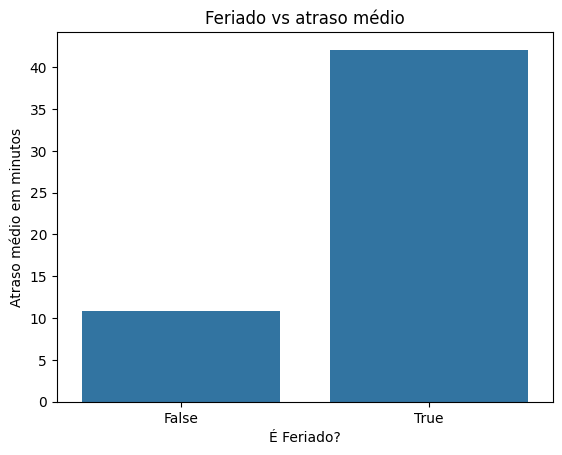

In [12]:
average_deplay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y ='delay', data=average_deplay)
plt.title('Feriado vs atraso médio')
plt.xlabel('É Feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show();

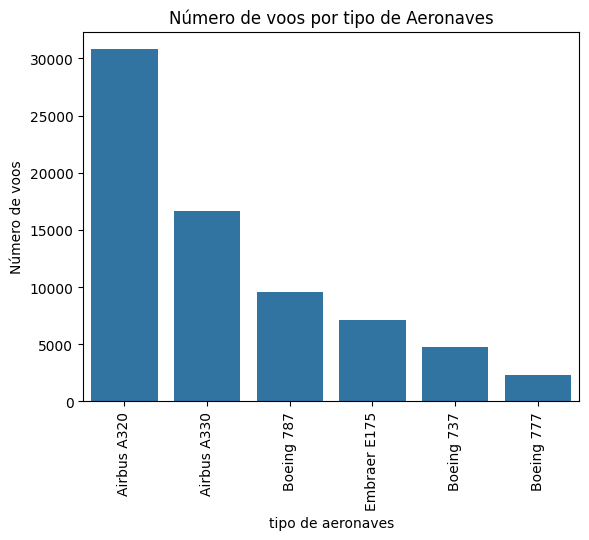

In [13]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order=order)
plt.title('Número de voos por tipo de Aeronaves')
plt.xlabel('tipo de aeronaves')
plt.xticks(rotation=90)
plt.ylabel('Número de voos')
plt.show();

Analisando a distribuição dos dados

In [14]:
import numpy as np

def calcular_largura_bin(df, coluna):
  Q75,Q25 = np.percentile(df[coluna], [75,25])
  IQR = Q75 - Q25
  largura_bin =2 * IQR * np.power(len(df[coluna]), -1/3)
  return largura_bin

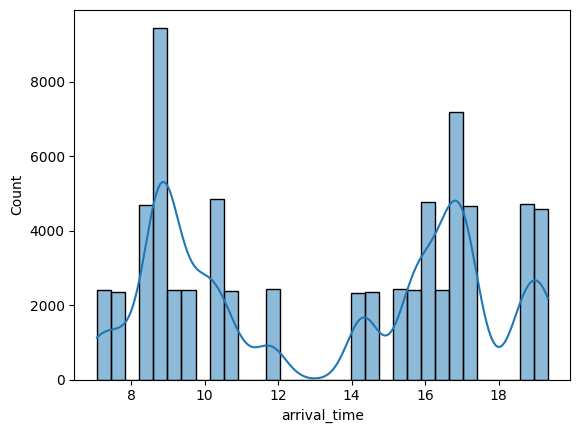

In [15]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados,x='arrival_time', kde=True,binwidth=largura_bin_at);

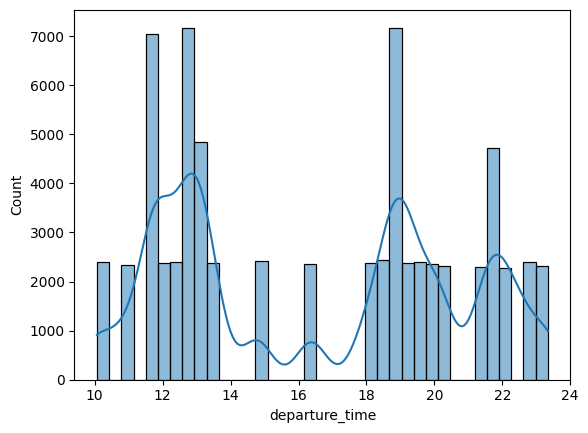

In [16]:
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados,x='departure_time', kde=True,binwidth=largura_bin_dt);

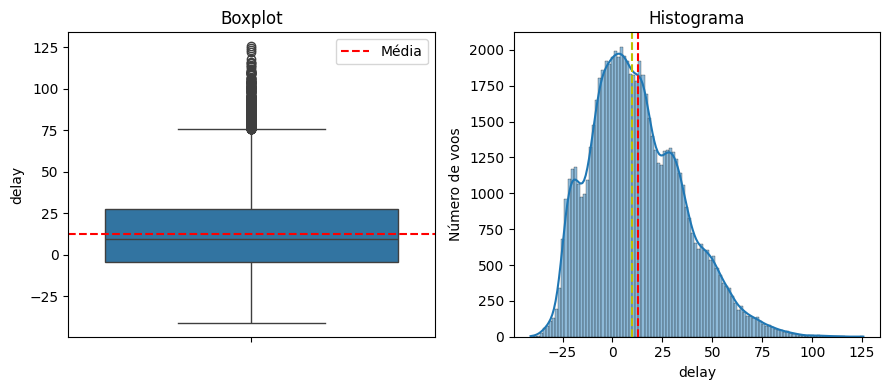

In [17]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay,color ='r',linestyle='--',label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')

sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--',label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--',label='Mediana')

plt.tight_layout()
plt.show()

Feauture engineering

In [18]:
dados['date']=pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day']+1).astype(str),format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [19]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

In [20]:
dados['day_name'] = dados['date'].dt.day_name()

In [21]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


Feature Encoding

In [22]:
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [23]:
dados['schengen'].value_counts()

,count
schengen,
schengen,42569
non-schengen,28606


In [24]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

/tmp/ipython-input-2385380026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
/tmp/ipython-input-2385380026.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
/tmp/ipython-input-2385380026.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [25]:
variaves_categoricas = ['airline','aircraft_type','origin','day_name']

In [31]:
df_encoded = pd.get_dummies(data=dados,columns=variaves_categoricas,dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
df_encoded[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [36]:
df_clean = df_encoded.drop(['flight_id','departure_time','day','year','date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Seleção e Validação de modelo

Treinamento do DummyRegressor

In [37]:
X = df_clean.drop(['delay'],axis=1)
y = df_clean['delay']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [40]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(X_train,y_train)

DummyRegressor()

In [41]:
y_pred_dummy = modelo_dummy.predict(X_test)

In [43]:
y_pred_dummy # media

array([12.52857512, 12.52857512, 12.52857512, ..., 12.52857512,
       12.52857512, 12.52857512])

In [49]:
#Metricas

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np

def calcular_metricas_regressao(y_test, y_pred):

  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  metricas = {
      'Raiz do Erro Quadrático Médio': round(rmse,4),
      'Erro Absoluto Médio': round(mae,4),
      'R2 Score': round(r2,4)

  }

  return metricas

In [50]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': np.float64(23.2241),
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

Treinamento do RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(max_depth=5, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': np.float64(13.7301),
 'Erro Absoluto Médio': 11.0138,
 'R2 Score': 0.6505}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


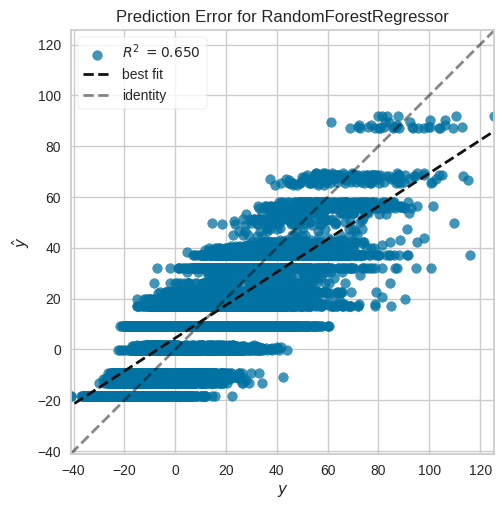

In [54]:
from yellowbrick.regressor import prediction_error

visualizar = prediction_error(modelo_rf,X_train,y_train,X_test,y_test);

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


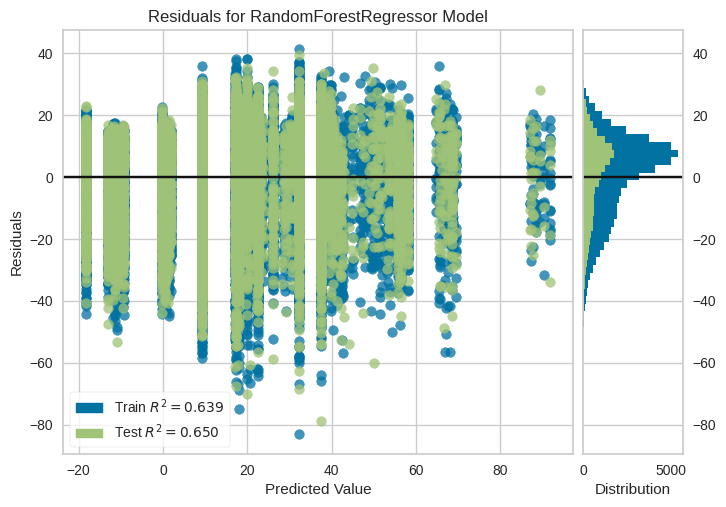

In [55]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo_rf,X_train,y_train,X_test,y_test)

Validação Cruzada

In [56]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(modelo_rf,X_train,y_train,cv=cv,scoring=scoring)

In [57]:
cv_results

{'fit_time': array([4.35804677, 3.09835172, 7.27938414, 3.01980329, 3.10242581]),
 'score_time': array([0.05891323, 0.07581949, 0.06028605, 0.05933952, 0.05779576]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [59]:
for metric in scoring.keys():
  scores = cv_results[f'test_{metric}']
  mean_score = "{:.3f}".format(scores.mean())
  std_score = "{:.3f}".format(scores.std())

  print(f"{metric.upper()} Score: {[f'{val:.3f}' for val in scores]}")
  print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
  print("-------------------------------------------------------------------")

MAE Score: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Média: -11.151, Std: 0.088
-------------------------------------------------------------------
RMSE Score: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Média: -13.883, Std: 0.101
-------------------------------------------------------------------
R2 Score: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Média: 0.638, Std: 0.008
-------------------------------------------------------------------


Otimização de hiperparametros

Seleção de recurso

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


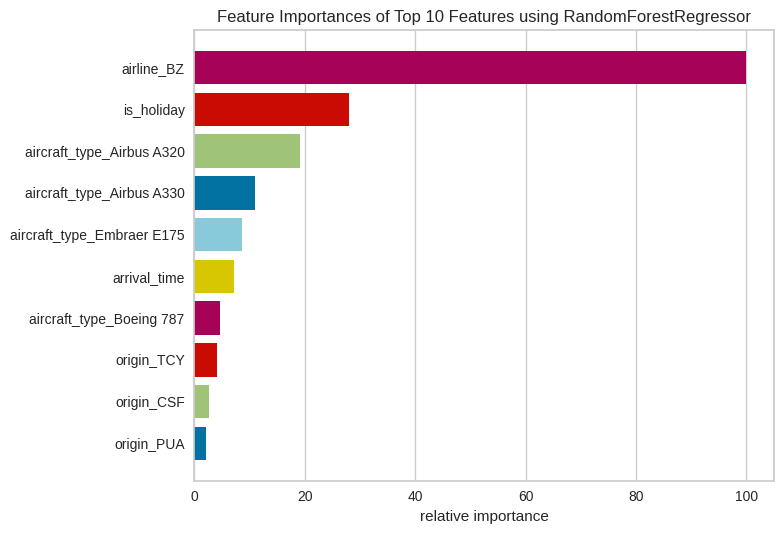

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [61]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(modelo_rf, relative=True, topn=10)
viz.fit(X_train,y_train)
viz.show()

In [67]:
importances = modelo_rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importances':importances })

In [72]:
feature_importances.sort_values('Importances', ascending=False)

,Feature,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


In [73]:
results_df = pd.DataFrame(index = ['RMSE', "MAE", 'R2'])

modelo_selected_features = RandomForestRegressor(random_state=42,max_depth=5)

for count in [1,5,10,15,20,25,30]:
  selected_features = feature_importances['Feature'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  modelo_selected_features.fit(X_train_selected,y_train)

  y_pred = modelo_selected_features.predict(X_test_selected)

  metricas = calcular_metricas_regressao(y_test,y_pred)

  results_df[count] = list(metricas.values())

results_df

,1,5,10,15,20,25,30
RMSE,23.0970,14.9389,14.3002,13.7406,13.7387,13.7284,13.7301
MAE,18.5637,12.0211,11.4904,11.0253,11.0242,11.0127,11.0138
R2,0.0109,0.5862,0.6208,0.6499,0.6500,0.6506,0.6505


In [75]:
results_df = pd.DataFrame(index = ['RMSE', "MAE", 'R2'])

modelo_selected_features = RandomForestRegressor(random_state=42,max_depth=5)

for count in range (10,16):
  selected_features = feature_importances['Feature'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  modelo_selected_features.fit(X_train_selected,y_train)

  y_pred = modelo_selected_features.predict(X_test_selected)

  metricas = calcular_metricas_regressao(y_test,y_pred)

  results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


In [76]:
selected_features = feature_importances['Feature'].values[:13]

X_selected_features = X[selected_features]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

Otimanzando os hiperparâmetros com GridSearchCV

In [78]:
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
cv = KFold(n_splits=5, shuffle=True,random_state=42)

modelo_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid=param_grid,scoring='r2', cv = cv )

modelo_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [81]:
modelo_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [82]:
y_pred_modelo_grid = modelo_grid.predict(X_test)

metricas_modelo_grid = calcular_metricas_regressao(y_test, y_pred_modelo_grid)
metricas_modelo_grid

{'Raiz do Erro Quadrático Médio': np.float64(13.2635),
 'Erro Absoluto Médio': 10.6731,
 'R2 Score': 0.6738}

In [83]:
results_df['modelo_grid'] = list(metricas_modelo_grid.values())
results_df

,10,11,12,13,14,15,modelo_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.2635
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,10.6731
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6738


Salvando modelo

In [85]:
import pickle

In [86]:
try:
  with open ('modelo_producao.pkl', 'wb') as file:
    pickle.dump(modelo_grid.best_estimator_, file )
  print("Modelo salvo com sucesso!!!")
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo:', str(e))


Modelo salvo com sucesso!!!
